In [68]:
from keras.applications.inception_v3 import InceptionV3
from keras.applications.inception_v3 import preprocess_input, decode_predictions
from keras.preprocessing import image
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Input
from keras import backend as K
from sklearn.metrics import confusion_matrix
from resizeimage import resizeimage
import numpy as np
import cv2 as cv
import os
import random
import PIL
import pickle
import matplotlib.pyplot as plt
import itertools



In [98]:
def load_data(classif):
    
    z = [x[0] for x in os.walk('../data/raw-img/')]
    del z[0]
    img = {} 
    for directory in z:
        current_name = directory.split('/')[-1]
        classe = classif[current_name]
        for file in os.listdir(directory):
            if file.endswith(".jpg") or file.endswith(".jpeg"):
                img[file] = classe
    return img

classif = {
		"cavallo" : 0,
		"elefante" : 1,
		"gatto" : 2,
        "pecora" : 3
	}

classifBis = {
		0 : "cavallo",
		1 : "elefante",
		2 : "gatto",
        3 : "pecora"
	}

img = load_data(classif)
print(img)

{'1716.jpeg': 2, '723.jpeg': 2, '1346.jpeg': 2, '689.jpeg': 2, '373.jpeg': 2, 'ea36b40d2df2003ed1584d05fb1d4e9fe777ead218ac104497f5c978a7e8b7bc_640.jpg': 2, 'e831b40a2cf2023ed1584d05fb1d4e9fe777ead218ac104497f5c978a7eebdbb_640.jpg': 2, '1653.jpeg': 2, 'ea35b70e2bf3033ed1584d05fb1d4e9fe777ead218ac104497f5c978a7eebdbb_640.jpg': 2, '1203.jpeg': 2, '1829.jpeg': 2, '47.jpeg': 2, '1311.jpeg': 2, 'ea36b30629f3013ed1584d05fb1d4e9fe777ead218ac104497f5c978a7e8b7bc_640.jpg': 2, 'ea37b90c20f0033ed1584d05fb1d4e9fe777ead218ac104497f5c978a7eebdbb_640.jpg': 2, '774.jpeg': 2, 'ea37b40d2cf1083ed1584d05fb1d4e9fe777ead218ac104497f5c978a7ebb0bb_640.jpg': 2, '1254.jpeg': 2, '1604.jpeg': 2, '631.jpeg': 2, 'ea35b0082df7033ed1584d05fb1d4e9fe777ead218ac104497f5c978a7ebb0bb_640.jpg': 2, '1487.jpeg': 2, '148.jpeg': 2, '10.jpeg': 2, 'ea37b90b2bf0013ed1584d05fb1d4e9fe777ead218ac104497f5c978a7ebb0bb_640.jpg': 2, '1192.jpeg': 2, '1038.jpeg': 2, '298.jpeg': 2, '1757.jpeg': 2, '1307.jpeg': 2, '332.jpeg': 2, '627.jpeg':

In [75]:
def computeCNN(cnn, classifBis, img):
    samples = []
    responses = []
    vects = {} 
    counter = 0
    for im in img:
        counter += 1
        print(counter,' /', 6100)
        TAILLE = [299, 299]
        myimage = PIL.Image.open('../data/raw-img/'+classifBis[img[im]]+'/'+im)
        myimage = resizeimage.resize_contain(myimage, TAILLE)
        img_data = image.img_to_array(myimage)
        img_data = np.expand_dims(img_data, axis=0)
        img_data = preprocess_input(img_data) #Normalisation des pixels

        googleNet_feature = cnn.predict(img_data)
        # Retrieve the vectors generated by InceptionV3
        vects[im] = googleNet_feature
    return vects

In [76]:
#Launch InceptionV3
#We load imagenet weights, desactivate the fully connected layer (MLP) and specify pooling mode to avg to retrieve 2D tensors
base_model = InceptionV3(weights='imagenet', include_top=False, pooling='avg')
base_model.summary()
vects = computeCNN(base_model, classifBis, img)
print(vects)


__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_7 (InputLayer)            (None, None, None, 3 0                                            
__________________________________________________________________________________________________
conv2d_565 (Conv2D)             (None, None, None, 3 864         input_7[0][0]                    
__________________________________________________________________________________________________
batch_normalization_565 (BatchN (None, None, None, 3 96          conv2d_565[0][0]                 
__________________________________________________________________________________________________
activation_565 (Activation)     (None, None, None, 3 0           batch_normalization_565[0][0]    
__________________________________________________________________________________________________
conv2d_566

2  / 6100
3  / 6100
4  / 6100
5  / 6100
6  / 6100
7  / 6100
8  / 6100
9  / 6100
10  / 6100
11  / 6100
12  / 6100
13  / 6100
14  / 6100
15  / 6100
16  / 6100
17  / 6100
18  / 6100
19  / 6100
20  / 6100
21  / 6100
22  / 6100
23  / 6100
24  / 6100
25  / 6100
26  / 6100
27  / 6100
28  / 6100
29  / 6100
30  / 6100
31  / 6100
32  / 6100
33  / 6100
34  / 6100
35  / 6100
36  / 6100
37  / 6100
38  / 6100
39  / 6100
40  / 6100
41  / 6100
42  / 6100
43  / 6100
44  / 6100
45  / 6100
46  / 6100
47  / 6100
48  / 6100
49  / 6100
50  / 6100
51  / 6100
52  / 6100
53  / 6100
54  / 6100
55  / 6100
56  / 6100
57  / 6100
58  / 6100
59  / 6100
60  / 6100
61  / 6100
62  / 6100
63  / 6100
64  / 6100
65  / 6100
66  / 6100
67  / 6100
68  / 6100
69  / 6100
70  / 6100
71  / 6100
72  / 6100
73  / 6100
74  / 6100
75  / 6100
76  / 6100
77  / 6100
78  / 6100
79  / 6100
80  / 6100
81  / 6100
82  / 6100
83  / 6100
84  / 6100
85  / 6100
86  / 6100
87  / 6100
88  / 6100
89  / 6100
90  / 6100
91  / 6100
92  / 6100
93  / 6

694  / 6100
695  / 6100
696  / 6100
697  / 6100
698  / 6100
699  / 6100
700  / 6100
701  / 6100
702  / 6100
703  / 6100
704  / 6100
705  / 6100
706  / 6100
707  / 6100
708  / 6100
709  / 6100
710  / 6100
711  / 6100
712  / 6100
713  / 6100
714  / 6100
715  / 6100
716  / 6100
717  / 6100
718  / 6100
719  / 6100
720  / 6100
721  / 6100
722  / 6100
723  / 6100
724  / 6100
725  / 6100
726  / 6100
727  / 6100
728  / 6100
729  / 6100
730  / 6100
731  / 6100
732  / 6100
733  / 6100
734  / 6100
735  / 6100
736  / 6100
737  / 6100
738  / 6100
739  / 6100
740  / 6100
741  / 6100
742  / 6100
743  / 6100
744  / 6100
745  / 6100
746  / 6100
747  / 6100
748  / 6100
749  / 6100
750  / 6100
751  / 6100
752  / 6100
753  / 6100
754  / 6100
755  / 6100
756  / 6100
757  / 6100
758  / 6100
759  / 6100
760  / 6100
761  / 6100
762  / 6100
763  / 6100
764  / 6100
765  / 6100
766  / 6100
767  / 6100
768  / 6100
769  / 6100
770  / 6100
771  / 6100
772  / 6100
773  / 6100
774  / 6100
775  / 6100
776  / 6100
777 

1348  / 6100
1349  / 6100
1350  / 6100
1351  / 6100
1352  / 6100
1353  / 6100
1354  / 6100
1355  / 6100
1356  / 6100
1357  / 6100
1358  / 6100
1359  / 6100
1360  / 6100
1361  / 6100
1362  / 6100
1363  / 6100
1364  / 6100
1365  / 6100
1366  / 6100
1367  / 6100
1368  / 6100
1369  / 6100
1370  / 6100
1371  / 6100
1372  / 6100
1373  / 6100
1374  / 6100
1375  / 6100
1376  / 6100
1377  / 6100
1378  / 6100
1379  / 6100
1380  / 6100
1381  / 6100
1382  / 6100
1383  / 6100
1384  / 6100
1385  / 6100
1386  / 6100
1387  / 6100
1388  / 6100
1389  / 6100
1390  / 6100
1391  / 6100
1392  / 6100
1393  / 6100
1394  / 6100
1395  / 6100
1396  / 6100
1397  / 6100
1398  / 6100
1399  / 6100
1400  / 6100
1401  / 6100
1402  / 6100
1403  / 6100
1404  / 6100
1405  / 6100
1406  / 6100
1407  / 6100
1408  / 6100
1409  / 6100
1410  / 6100
1411  / 6100
1412  / 6100
1413  / 6100
1414  / 6100
1415  / 6100
1416  / 6100
1417  / 6100
1418  / 6100
1419  / 6100
1420  / 6100
1421  / 6100
1422  / 6100
1423  / 6100
1424  / 6100

1979  / 6100
1980  / 6100
1981  / 6100
1982  / 6100
1983  / 6100
1984  / 6100
1985  / 6100
1986  / 6100
1987  / 6100
1988  / 6100
1989  / 6100
1990  / 6100
1991  / 6100
1992  / 6100
1993  / 6100
1994  / 6100
1995  / 6100
1996  / 6100
1997  / 6100
1998  / 6100
1999  / 6100
2000  / 6100
2001  / 6100
2002  / 6100
2003  / 6100
2004  / 6100
2005  / 6100
2006  / 6100
2007  / 6100
2008  / 6100
2009  / 6100
2010  / 6100
2011  / 6100
2012  / 6100
2013  / 6100
2014  / 6100
2015  / 6100
2016  / 6100
2017  / 6100
2018  / 6100
2019  / 6100
2020  / 6100
2021  / 6100
2022  / 6100
2023  / 6100
2024  / 6100
2025  / 6100
2026  / 6100
2027  / 6100
2028  / 6100
2029  / 6100
2030  / 6100
2031  / 6100
2032  / 6100
2033  / 6100
2034  / 6100
2035  / 6100
2036  / 6100
2037  / 6100
2038  / 6100
2039  / 6100
2040  / 6100
2041  / 6100
2042  / 6100
2043  / 6100
2044  / 6100
2045  / 6100
2046  / 6100
2047  / 6100
2048  / 6100
2049  / 6100
2050  / 6100
2051  / 6100
2052  / 6100
2053  / 6100
2054  / 6100
2055  / 6100

2610  / 6100
2611  / 6100
2612  / 6100
2613  / 6100
2614  / 6100
2615  / 6100
2616  / 6100
2617  / 6100
2618  / 6100
2619  / 6100
2620  / 6100
2621  / 6100
2622  / 6100
2623  / 6100
2624  / 6100
2625  / 6100
2626  / 6100
2627  / 6100
2628  / 6100
2629  / 6100
2630  / 6100
2631  / 6100
2632  / 6100
2633  / 6100
2634  / 6100
2635  / 6100
2636  / 6100
2637  / 6100
2638  / 6100
2639  / 6100
2640  / 6100
2641  / 6100
2642  / 6100
2643  / 6100
2644  / 6100
2645  / 6100
2646  / 6100
2647  / 6100
2648  / 6100
2649  / 6100
2650  / 6100
2651  / 6100
2652  / 6100
2653  / 6100
2654  / 6100
2655  / 6100
2656  / 6100
2657  / 6100
2658  / 6100
2659  / 6100
2660  / 6100
2661  / 6100
2662  / 6100
2663  / 6100
2664  / 6100
2665  / 6100
2666  / 6100
2667  / 6100
2668  / 6100
2669  / 6100
2670  / 6100
2671  / 6100
2672  / 6100
2673  / 6100
2674  / 6100
2675  / 6100
2676  / 6100
2677  / 6100
2678  / 6100
2679  / 6100
2680  / 6100
2681  / 6100
2682  / 6100
2683  / 6100
2684  / 6100
2685  / 6100
2686  / 6100

3241  / 6100
3242  / 6100
3243  / 6100
3244  / 6100
3245  / 6100
3246  / 6100
3247  / 6100
3248  / 6100
3249  / 6100
3250  / 6100
3251  / 6100
3252  / 6100
3253  / 6100
3254  / 6100
3255  / 6100
3256  / 6100
3257  / 6100
3258  / 6100
3259  / 6100
3260  / 6100
3261  / 6100
3262  / 6100
3263  / 6100
3264  / 6100
3265  / 6100
3266  / 6100
3267  / 6100
3268  / 6100
3269  / 6100
3270  / 6100
3271  / 6100
3272  / 6100
3273  / 6100
3274  / 6100
3275  / 6100
3276  / 6100
3277  / 6100
3278  / 6100
3279  / 6100
3280  / 6100
3281  / 6100
3282  / 6100
3283  / 6100
3284  / 6100
3285  / 6100
3286  / 6100
3287  / 6100
3288  / 6100
3289  / 6100
3290  / 6100
3291  / 6100
3292  / 6100
3293  / 6100
3294  / 6100
3295  / 6100
3296  / 6100
3297  / 6100
3298  / 6100
3299  / 6100
3300  / 6100
3301  / 6100
3302  / 6100
3303  / 6100
3304  / 6100
3305  / 6100
3306  / 6100
3307  / 6100
3308  / 6100
3309  / 6100
3310  / 6100
3311  / 6100
3312  / 6100
3313  / 6100
3314  / 6100
3315  / 6100
3316  / 6100
3317  / 6100

3872  / 6100
3873  / 6100
3874  / 6100
3875  / 6100
3876  / 6100
3877  / 6100
3878  / 6100
3879  / 6100
3880  / 6100
3881  / 6100
3882  / 6100
3883  / 6100
3884  / 6100
3885  / 6100
3886  / 6100
3887  / 6100
3888  / 6100
3889  / 6100
3890  / 6100
3891  / 6100
3892  / 6100
3893  / 6100
3894  / 6100
3895  / 6100
3896  / 6100
3897  / 6100
3898  / 6100
3899  / 6100
3900  / 6100
3901  / 6100
3902  / 6100
3903  / 6100
3904  / 6100
3905  / 6100
3906  / 6100
3907  / 6100
3908  / 6100
3909  / 6100
3910  / 6100
3911  / 6100
3912  / 6100
3913  / 6100
3914  / 6100
3915  / 6100
3916  / 6100
3917  / 6100
3918  / 6100
3919  / 6100
3920  / 6100
3921  / 6100
3922  / 6100
3923  / 6100
3924  / 6100
3925  / 6100
3926  / 6100
3927  / 6100
3928  / 6100
3929  / 6100
3930  / 6100
3931  / 6100
3932  / 6100
3933  / 6100
3934  / 6100
3935  / 6100
3936  / 6100
3937  / 6100
3938  / 6100
3939  / 6100
3940  / 6100
3941  / 6100
3942  / 6100
3943  / 6100
3944  / 6100
3945  / 6100
3946  / 6100
3947  / 6100
3948  / 6100

4503  / 6100
4504  / 6100
4505  / 6100
4506  / 6100
4507  / 6100
4508  / 6100
4509  / 6100
4510  / 6100
4511  / 6100
4512  / 6100
4513  / 6100
4514  / 6100
4515  / 6100
4516  / 6100
4517  / 6100
4518  / 6100
4519  / 6100
4520  / 6100
4521  / 6100
4522  / 6100
4523  / 6100
4524  / 6100
4525  / 6100
4526  / 6100
4527  / 6100
4528  / 6100
4529  / 6100
4530  / 6100
4531  / 6100
4532  / 6100
4533  / 6100
4534  / 6100
4535  / 6100
4536  / 6100
4537  / 6100
4538  / 6100
4539  / 6100
4540  / 6100
4541  / 6100
4542  / 6100
4543  / 6100
4544  / 6100
4545  / 6100
4546  / 6100
4547  / 6100
4548  / 6100
4549  / 6100
4550  / 6100
4551  / 6100
4552  / 6100
4553  / 6100
4554  / 6100
4555  / 6100
4556  / 6100
4557  / 6100
4558  / 6100
4559  / 6100
4560  / 6100
4561  / 6100
4562  / 6100
4563  / 6100
4564  / 6100
4565  / 6100
4566  / 6100
4567  / 6100
4568  / 6100
4569  / 6100
4570  / 6100
4571  / 6100
4572  / 6100
4573  / 6100
4574  / 6100
4575  / 6100
4576  / 6100
4577  / 6100
4578  / 6100
4579  / 6100

5134  / 6100
5135  / 6100
5136  / 6100
5137  / 6100
5138  / 6100
5139  / 6100
5140  / 6100
5141  / 6100
5142  / 6100
5143  / 6100
5144  / 6100
5145  / 6100
5146  / 6100
5147  / 6100
5148  / 6100
5149  / 6100
5150  / 6100
5151  / 6100
5152  / 6100
5153  / 6100
5154  / 6100
5155  / 6100
5156  / 6100
5157  / 6100
5158  / 6100
5159  / 6100
5160  / 6100
5161  / 6100
5162  / 6100
5163  / 6100
5164  / 6100
5165  / 6100
5166  / 6100
5167  / 6100
5168  / 6100
5169  / 6100
5170  / 6100
5171  / 6100
5172  / 6100
5173  / 6100
5174  / 6100
5175  / 6100
5176  / 6100
5177  / 6100
5178  / 6100
5179  / 6100
5180  / 6100
5181  / 6100
5182  / 6100
5183  / 6100
5184  / 6100
5185  / 6100
5186  / 6100
5187  / 6100
5188  / 6100
5189  / 6100
5190  / 6100
5191  / 6100
5192  / 6100
5193  / 6100
5194  / 6100
5195  / 6100
5196  / 6100
5197  / 6100
5198  / 6100
5199  / 6100
5200  / 6100
5201  / 6100
5202  / 6100
5203  / 6100
5204  / 6100
5205  / 6100
5206  / 6100
5207  / 6100
5208  / 6100
5209  / 6100
5210  / 6100

5765  / 6100
5766  / 6100
5767  / 6100
5768  / 6100
5769  / 6100
5770  / 6100
5771  / 6100
5772  / 6100
5773  / 6100
5774  / 6100
5775  / 6100
5776  / 6100
5777  / 6100
5778  / 6100
5779  / 6100
5780  / 6100
5781  / 6100
5782  / 6100
5783  / 6100
5784  / 6100
5785  / 6100
5786  / 6100
5787  / 6100
5788  / 6100
5789  / 6100
5790  / 6100
5791  / 6100
5792  / 6100
5793  / 6100
5794  / 6100
5795  / 6100
5796  / 6100
5797  / 6100
5798  / 6100
5799  / 6100
5800  / 6100
5801  / 6100
5802  / 6100
5803  / 6100
5804  / 6100
5805  / 6100
5806  / 6100
5807  / 6100
5808  / 6100
5809  / 6100
5810  / 6100
5811  / 6100
5812  / 6100
5813  / 6100
5814  / 6100
5815  / 6100
5816  / 6100
5817  / 6100
5818  / 6100
5819  / 6100
5820  / 6100
5821  / 6100
5822  / 6100
5823  / 6100
5824  / 6100
5825  / 6100
5826  / 6100
5827  / 6100
5828  / 6100
5829  / 6100
5830  / 6100
5831  / 6100
5832  / 6100
5833  / 6100
5834  / 6100
5835  / 6100
5836  / 6100
5837  / 6100
5838  / 6100
5839  / 6100
5840  / 6100
5841  / 6100

6396  / 6100
6397  / 6100
6398  / 6100
6399  / 6100
6400  / 6100
6401  / 6100
6402  / 6100
6403  / 6100
6404  / 6100
6405  / 6100
6406  / 6100
6407  / 6100
6408  / 6100
6409  / 6100
6410  / 6100
6411  / 6100
6412  / 6100
6413  / 6100
6414  / 6100
6415  / 6100
6416  / 6100
6417  / 6100
6418  / 6100
6419  / 6100
6420  / 6100
6421  / 6100
6422  / 6100
6423  / 6100
6424  / 6100
6425  / 6100
6426  / 6100
6427  / 6100
6428  / 6100
6429  / 6100
6430  / 6100
6431  / 6100
6432  / 6100
6433  / 6100
6434  / 6100
6435  / 6100
6436  / 6100
6437  / 6100
6438  / 6100
6439  / 6100
6440  / 6100
6441  / 6100
6442  / 6100
6443  / 6100
6444  / 6100
6445  / 6100
6446  / 6100
6447  / 6100
6448  / 6100
6449  / 6100
6450  / 6100
6451  / 6100
6452  / 6100
6453  / 6100
6454  / 6100
6455  / 6100
6456  / 6100
6457  / 6100
6458  / 6100
6459  / 6100
6460  / 6100
6461  / 6100
6462  / 6100
6463  / 6100
6464  / 6100
6465  / 6100
6466  / 6100
6467  / 6100
6468  / 6100
6469  / 6100
6470  / 6100
6471  / 6100
6472  / 6100

7027  / 6100
7028  / 6100
7029  / 6100
7030  / 6100
7031  / 6100
7032  / 6100
7033  / 6100
7034  / 6100
7035  / 6100
7036  / 6100
7037  / 6100
7038  / 6100
7039  / 6100
7040  / 6100
7041  / 6100
7042  / 6100
7043  / 6100
7044  / 6100
7045  / 6100
7046  / 6100
7047  / 6100
7048  / 6100
7049  / 6100
7050  / 6100
7051  / 6100
7052  / 6100
7053  / 6100
7054  / 6100
7055  / 6100
7056  / 6100
7057  / 6100
7058  / 6100
7059  / 6100
7060  / 6100
7061  / 6100
7062  / 6100
7063  / 6100
7064  / 6100
7065  / 6100
7066  / 6100
7067  / 6100
7068  / 6100
7069  / 6100
7070  / 6100
7071  / 6100
7072  / 6100
7073  / 6100
7074  / 6100
7075  / 6100
7076  / 6100
7077  / 6100
7078  / 6100
7079  / 6100
7080  / 6100
7081  / 6100
7082  / 6100
7083  / 6100
7084  / 6100
7085  / 6100
7086  / 6100
7087  / 6100
7088  / 6100
7089  / 6100
7090  / 6100
7091  / 6100
7092  / 6100
7093  / 6100
7094  / 6100
7095  / 6100
7096  / 6100
7097  / 6100
7098  / 6100
7099  / 6100
7100  / 6100
7101  / 6100
7102  / 6100
7103  / 6100

7658  / 6100
7659  / 6100
7660  / 6100
7661  / 6100
7662  / 6100
7663  / 6100
7664  / 6100
7665  / 6100
7666  / 6100
7667  / 6100
7668  / 6100
7669  / 6100
7670  / 6100
7671  / 6100
7672  / 6100
7673  / 6100
7674  / 6100
7675  / 6100
7676  / 6100
7677  / 6100
7678  / 6100
7679  / 6100
7680  / 6100
7681  / 6100
7682  / 6100
7683  / 6100
7684  / 6100
7685  / 6100
7686  / 6100
7687  / 6100
7688  / 6100
7689  / 6100
7690  / 6100
7691  / 6100
7692  / 6100
7693  / 6100
7694  / 6100
7695  / 6100
7696  / 6100
7697  / 6100
7698  / 6100
7699  / 6100
7700  / 6100
7701  / 6100
7702  / 6100
7703  / 6100
7704  / 6100
7705  / 6100
7706  / 6100
7707  / 6100
7708  / 6100
7709  / 6100
7710  / 6100
7711  / 6100
7712  / 6100
7713  / 6100
7714  / 6100
7715  / 6100
7716  / 6100
7717  / 6100
7718  / 6100
7719  / 6100
7720  / 6100
7721  / 6100
7722  / 6100
7723  / 6100
7724  / 6100
7725  / 6100
7726  / 6100
7727  / 6100
7728  / 6100
7729  / 6100
7730  / 6100
7731  / 6100
7732  / 6100
7733  / 6100
7734  / 6100

In [77]:
'''
We save the vector's dictionnary to don't compute it each time
'''
with open('saveVectors.pickle', 'wb') as handle:
    pickle.dump(vects, handle, protocol=pickle.HIGHEST_PROTOCOL)
    

In [99]:
'''
We retrieve the vector's dictionnary 
'''
with open('saveVectors.pickle', 'rb') as handle:
    vects = pickle.load(handle)
    
def load_cnn_vectors(vectors, img):
    '''
    Take the output vectors of the cnn inceptionV3 and create samples and responses with the data of load_class
    '''
    samples = []
    responses = []
    keys=list(vectors.keys()) # List of keys
    random.shuffle(keys)
    for key in keys :
        samples.append(vectors[key][0])
        responses.append(img[key])
    return np.array(samples).astype(np.float32), np.array(responses)

#Creation of sample data
samples, responses = load_cnn_vectors(vects, img)
print(samples.shape)
print(responses)

(8028, 2048)
[2 2 1 ... 0 1 3]


In [103]:
'''
My MLP Model
'''
class VocStatModel(object):
    class_n = 4
    train_ratio = 0.90

    def load(self, fn):
        self.model.load(fn)
    def save(self, fn):
        self.model.save(fn)

    def unroll_samples(self, samples):
        sample_n, var_n = samples.shape
        new_samples = np.zeros((sample_n * self.class_n, var_n+1), np.float32)
        new_samples[:,:-1] = np.repeat(samples, self.class_n, axis=0)
        new_samples[:,-1] = np.tile(np.arange(self.class_n), sample_n)
        return new_samples

    def unroll_responses(self, responses):
        sample_n = len(responses)
        new_responses = np.zeros(sample_n*self.class_n, np.int32)
        resp_idx = np.int32( responses + np.arange(sample_n)*self.class_n )
        new_responses[resp_idx] = 1
        return new_responses


class MLP(VocStatModel):
    def __init__(self):
        self.model = cv.ml.ANN_MLP_create()

    def train(self, samples, responses):
        _sample_n, var_n = samples.shape
        new_responses = self.unroll_responses(responses).reshape(-1, self.class_n)
        layer_sizes = np.int32([var_n,130,90,60,self.class_n])

        self.model.setLayerSizes(layer_sizes)
        self.model.setTrainMethod(cv.ml.ANN_MLP_BACKPROP)
        self.model.setBackpropMomentumScale(0.0)
        self.model.setBackpropWeightScale(0.0001)
        self.model.setTermCriteria((cv.TERM_CRITERIA_COUNT, 20, 0.01))
        self.model.setActivationFunction(cv.ml.ANN_MLP_SIGMOID_SYM, 2, 1)

        self.model.train(samples, cv.ml.ROW_SAMPLE, np.float32(new_responses))

    def predict(self, samples):
        _ret, resp = self.model.predict(samples)
        return resp.argmax(-1)



In [104]:
model = MLP()

train_n = int(len(samples)*model.train_ratio)
print("training...")
model.train(samples[:train_n], responses[:train_n])
print('testing...')
train_rate = np.mean(model.predict(samples[:train_n]) == responses[:train_n].astype(int))
predict = model.predict(samples[train_n:])
print(predict)
print(responses[train_n:])
responseToPlot = responses[train_n:].astype(int)
test_rate  = np.mean(predict == responseToPlot)

print('train rate: %f  test rate: %f' % (train_rate*100, test_rate*100))

training...
testing...
[0 1 3 1 3 1 3 2 0 0 0 1 3 3 0 0 0 0 2 3 0 2 0 2 1 2 3 3 0 2 2 3 0 0 3 0 2
 2 2 1 0 1 0 1 0 1 2 3 0 3 1 0 1 1 1 2 3 1 3 3 0 3 2 1 3 0 2 2 3 2 0 0 0 1
 2 1 2 0 3 0 3 3 2 0 0 1 1 1 3 3 1 2 1 0 2 3 2 1 3 1 0 1 0 3 0 1 3 1 1 0 0
 0 0 0 2 1 3 3 2 2 0 0 0 0 3 3 3 0 2 1 0 0 3 1 0 0 1 2 2 0 0 2 3 1 1 2 0 3
 2 2 0 0 2 1 1 2 3 0 2 2 2 3 3 3 3 2 0 1 3 1 0 0 0 2 1 0 0 2 3 0 0 0 1 0 1
 2 3 2 3 1 1 1 1 0 0 3 2 3 3 1 0 1 2 0 1 3 0 3 0 0 2 0 3 1 1 0 2 2 2 1 3 2
 3 2 0 0 0 1 3 0 3 3 0 2 2 3 2 2 1 2 3 3 2 3 0 2 3 1 0 0 3 1 1 3 3 3 1 0 1
 3 1 2 3 3 0 0 2 2 2 0 2 2 0 0 3 0 1 2 2 3 0 0 0 2 3 0 0 3 0 2 0 3 0 0 2 2
 0 1 0 0 2 1 1 3 0 1 3 2 0 3 2 2 0 0 0 0 0 0 0 3 0 0 3 2 1 2 2 0 0 0 3 0 3
 3 3 1 2 3 0 1 0 0 0 2 2 0 2 1 3 3 2 0 3 1 0 1 2 3 0 2 0 0 0 0 2 1 2 2 0 2
 1 3 1 3 3 1 3 2 1 0 3 3 0 2 3 0 0 0 2 3 2 2 1 3 3 3 0 3 1 2 3 1 0 0 3 3 3
 2 1 0 2 3 0 3 3 3 0 2 0 2 0 2 0 0 2 2 2 0 1 1 1 1 1 1 0 2 2 3 0 2 3 2 1 3
 1 0 0 1 0 1 2 1 3 2 3 0 0 2 1 0 3 0 1 1 2 2 1 2 3 0 0 2 3 2 1 0 1 0 3 2 0
 0

Normalized confusion matrix


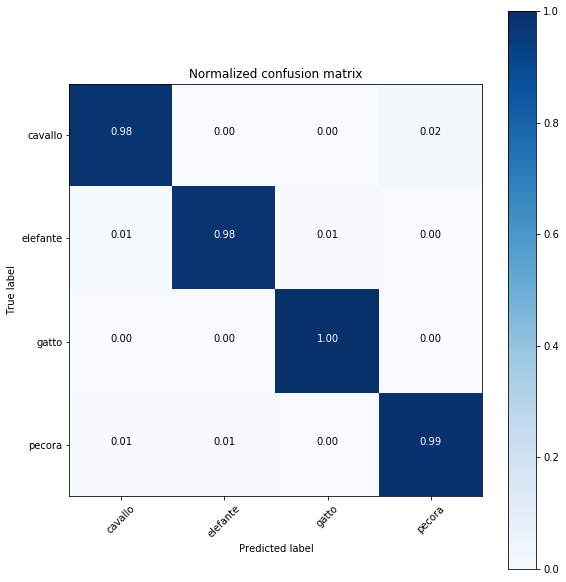

In [105]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    
# Compute confusion matrix
cnf_matrix = confusion_matrix(responseToPlot, predict)
np.set_printoptions(precision=2)
# Plot normalized confusion matrix
plt.figure(figsize=(800/96, 800/96))
plot_confusion_matrix(cnf_matrix, classes=classif, normalize=True,
                      title='Normalized confusion matrix')
plt.savefig('ConfusionNew.png')